<a href="https://colab.research.google.com/github/hhhuynh3/practice_225A/blob/main/in_class_sets/pandas_practice_bms225a_10022024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas
import pandas as pd

# 1. Loading a csv file with Pandas

We'll start by reading the `patient_data.csv` file. This dataset contains the following patient information (adapted from: `https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data`):

- `patient_id`: unique id of the patient
- `age`: the age of the patient (in days!)
- `gender`: Male/Female
- `height`: measured height in cm
- `weight`: patient weight in kg
- `smoke` : smoking or not
- `alco` :  drinks alcohol or not
- `active`: physically active or not

---

> Reading and Writing Data
Reading data means bringing it into Python from a file, such as CSV. Pandas provides a very convenient way to do this using the `read_csv()` function. After making changes to our data, we often want to save it back to a file. We can use the `to_csv()` function to write a DataFrame to a CSV file.

In [ ]:
# Reading the patient data from the CSV file into a dataframe
patient_data = pd.read_csv('patient_data.csv')

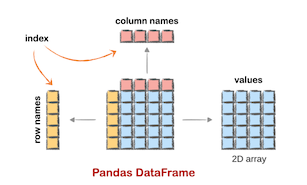

#### inspecting the dataframe

In [ ]:
# Displaying the first few rows to understand the structure of the dataset
# This is useful for a quick overview of what kind of data we're working with
patient_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active
0,43005,15375,Male,169,68.0,False,False,False
1,76878,21712,Female,182,91.0,True,False,True
2,68983,22699,Male,166,72.0,False,False,False
3,61210,21163,Female,172,65.0,True,True,True
4,68948,19650,Male,168,72.0,False,False,True


In [ ]:
# Finding out how many rows (patients) are in the dataset
# The len() function here tells us the number of rows (each row represents a patient)
len(patient_data)

70000

In [ ]:
# Alternatively, we can use the .shape attribute to see both rows and columns
patient_data.shape

(70000, 8)

In [ ]:
# Displaying the data types for each column
# Helps to understand what kind of data we are dealing with in each column
patient_data.dtypes

,0
patient_id,int64
age,int64
gender,object
height,int64
weight,float64
smoke,bool
alco,bool
active,bool


> The `object` data type is a general-purpose data type used to store data that doesn't fit into the typical numeric types (`int`, `float`) or other more specific types (`bool`, `datetime`, etc.). It's commonly used for text but can also hold mixed types, like numbers and strings.


In [ ]:
# Listing the column names of the DataFrame
# Columns act as labels for the data, indicating what kind of information each column contains
patient_data.columns

Index(['patient_id', 'age', 'gender', 'height', 'weight', 'smoke', 'alco',
       'active'],
      dtype='object')

In [ ]:
# Listing the row indexes; by default, pandas creates an index starting at 0
patient_data.index

RangeIndex(start=0, stop=70000, step=1)

In [ ]:
# Setting 'height' as the index of the DataFrame (for demonstration purposes)
# Note that this does not change the DataFrame unless assigned
patient_data.set_index('height')

,patient_id,age,gender,weight,smoke,alco,active
height,,,,,,,
169,43005,15375,Male,68.0,False,False,False
182,76878,21712,Female,91.0,True,False,True
166,68983,22699,Male,72.0,False,False,False
172,61210,21163,Female,65.0,True,True,True
168,68948,19650,Male,72.0,False,False,True
...,...,...,...,...,...,...,...
165,71326,20266,Male,59.0,False,False,False
168,71385,21304,Male,91.0,False,False,True
162,42454,20368,Male,79.0,False,False,True


In [ ]:
# To actually change the DataFrame, we need to assign it to itself or another variable
patient_data = patient_data.set_index('patient_id')
patient_data.head()

,age,gender,height,weight,smoke,alco,active
patient_id,,,,,,,
43005,15375,Male,169,68.0,False,False,False
76878,21712,Female,182,91.0,True,False,True
68983,22699,Male,166,72.0,False,False,False
61210,21163,Female,172,65.0,True,True,True
68948,19650,Male,168,72.0,False,False,True


In [ ]:
# Resetting the index to the default numeric one
# The inplace=True parameter updates the DataFrame directly
patient_data.reset_index(inplace=True)
patient_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active
0,43005,15375,Male,169,68.0,False,False,False
1,76878,21712,Female,182,91.0,True,False,True
2,68983,22699,Male,166,72.0,False,False,False
3,61210,21163,Female,172,65.0,True,True,True
4,68948,19650,Male,168,72.0,False,False,True


In [ ]:
# Viewing a specific column - returns a pandas Series
# A Series is similar to a DataFrame, but it only has one column
patient_data['height']

,height
0,169
1,182
2,166
3,172
4,168
...,...
69995,165
69996,168
69997,162
69998,162


In [ ]:
# Getting basic statistics for a numerical column such as mean, standard deviation, etc.
patient_data['height'].describe()

,height
count,70000.000000
mean,164.359229
std,8.210126
min,55.000000
25%,159.000000
50%,165.000000
75%,170.000000
max,250.000000


In [ ]:
# We can also count occurences of values in a column for understanding the distribution of categorical data
# Below, we are counting the number of occurrences of each value in the 'gender' column
patient_data['gender'].value_counts()

,count
gender,
Male,45530
Female,24470


#### basic column operations

In [ ]:
# Lets make everyone a little bit taller by adding 0.1 to the height column : )
# Note: This operation does not update the DataFrame unless reassigned
patient_data['height'] + 0.1

,height
0,169.1
1,182.1
2,166.1
3,172.1
4,168.1
...,...
69995,165.1
69996,168.1
69997,162.1
69998,162.1


In [ ]:
# Verifying that this did not update the dataframe
patient_data['height'].head()

,height
0,169
1,182
2,166
3,172
4,168


In [ ]:
# To make the changes permanent, we need to assign the updated values back to the DataFrame
patient_data['height'] = patient_data['height'] + 0.1
patient_data['height'].head()

,height
0,169.1
1,182.1
2,166.1
3,172.1
4,168.1


In [ ]:
# Removing the 'height' column
# Deleting columns is useful for cleaning up datasets and removing unneeded data
del patient_data['height']
patient_data.head()

,patient_id,age,gender,weight,smoke,alco,active
0,43005,15375,Male,68.0,False,False,False
1,76878,21712,Female,91.0,True,False,True
2,68983,22699,Male,72.0,False,False,False
3,61210,21163,Female,65.0,True,True,True
4,68948,19650,Male,72.0,False,False,True


#### writing a csv file to disk

In [ ]:
# Writing the updated DataFrame to a new CSV file
# The index=False parameter prevents pandas from writing the row index to the CSV file
patient_data.to_csv('patient_data_no_height.csv', index=False) # notice that this appeared in the Files tab.

In [ ]:
# Lets reload the original data and move on to the next section
patient_data = pd.read_csv('patient_data.csv')
patient_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active
0,43005,15375,Male,169,68.0,False,False,False
1,76878,21712,Female,182,91.0,True,False,True
2,68983,22699,Male,166,72.0,False,False,False
3,61210,21163,Female,172,65.0,True,True,True
4,68948,19650,Male,168,72.0,False,False,True


# 2. Indexing, Subsetting, and Creating Columns

In this section, we'll learn how to:
1. Access specific rows and columns from our data (indexing).
2. Create subsets of the data to focus on particular participants or attributes.
3. Create new columns, which is often needed for calculations or adding more information.

Let's start by selecting some specific information from our datasets.


In [ ]:
# Creating a subset of the data with specific columns - 'age' and 'gender'
# This is useful for focusing on a specific set of features in the data
age_gender = patient_data[['age', 'gender']]
age_gender.head()

,age,gender
0,15375,Male
1,21712,Female
2,22699,Male
3,21163,Female
4,19650,Male


In [ ]:
# Selecting specific rows by index
# This helps in narrowing down to particular records in the dataset
subset_data = patient_data.iloc[:7]  # e.g., selecting the first 7 rows
subset_data

,patient_id,age,gender,height,weight,smoke,alco,active
0,43005,15375,Male,169,68.0,False,False,False
1,76878,21712,Female,182,91.0,True,False,True
2,68983,22699,Male,166,72.0,False,False,False
3,61210,21163,Female,172,65.0,True,True,True
4,68948,19650,Male,168,72.0,False,False,True
5,38586,15899,Male,163,69.0,False,False,False
6,63636,16063,Male,153,82.0,False,False,False


In [ ]:
# Selecting a specific row by its index
# Note: Index is zero-based, so row 3 is actually the fourth row
patient_data.iloc[3]

,3
patient_id,61210
age,21163
gender,Female
height,172
weight,65.0
smoke,True
alco,True
active,True


#### Creating Subsets Based on Conditions

We can also subset the data based on certain conditions, such as:
- Filtering patients by gender.
- Filtering patients with certain attributes like weight or height.


In [ ]:
# Selecting only male patients
patient_data[patient_data['gender'] == 'Male']

,patient_id,age,gender,height,weight,smoke,alco,active
0,43005,15375,Male,169,68.0,False,False,False
2,68983,22699,Male,166,72.0,False,False,False
4,68948,19650,Male,168,72.0,False,False,True
5,38586,15899,Male,163,69.0,False,False,False
6,63636,16063,Male,153,82.0,False,False,False
...,...,...,...,...,...,...,...,...
69993,92309,21883,Male,149,49.0,False,False,True
69995,71326,20266,Male,165,59.0,False,False,False
69996,71385,21304,Male,168,91.0,False,False,True
69997,42454,20368,Male,162,79.0,False,False,True


In [ ]:
# Selecting patients with weight greater than 180
patient_data[patient_data['weight'] > 180]

,patient_id,age,gender,height,weight,smoke,alco,active
11221,52564,19630,Male,161,181.0,False,False,True
12107,71945,15117,Female,180,200.0,False,False,True
62567,87498,20939,Female,180,183.0,False,True,True
63757,618,16765,Male,186,200.0,False,False,False


In [ ]:
# Selecting patients with weight greater than 180 and height greater than 185
patient_data[(patient_data['weight'] > 180) & (patient_data['height'] > 185)]

,patient_id,age,gender,height,weight,smoke,alco,active
63757,618,16765,Male,186,200.0,False,False,False


In [ ]:
# Creating a backup of the patient data before making further changes
patient_data_backup = patient_data.copy()

In [ ]:
# If needed, we can restore from the above copy by using:
# patient_data = patient_data_backup.copy()

#### Creating New Columns

Often we need to create new columns for further analysis.


In [ ]:
# age is given in days -- Let's convert to years!
patient_data['age']/365

,age
0,42.123288
1,59.484932
2,62.189041
3,57.980822
4,53.835616
...,...
69995,55.523288
69996,58.367123
69997,55.802740
69998,59.498630


In [ ]:
# actually lets update the age column in the dataframe
# One has to be careful when doing this (re-running this cell will keep updating the age)
patient_data['age'] = (patient_data['age']/365).round(1) # round to one decimal place
patient_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active
0,43005,42.1,Male,169,68.0,False,False,False
1,76878,59.5,Female,182,91.0,True,False,True
2,68983,62.2,Male,166,72.0,False,False,False
3,61210,58.0,Female,172,65.0,True,True,True
4,68948,53.8,Male,168,72.0,False,False,True


In [ ]:
# Creating a new column for BMI (Body Mass Index)
# BMI = weight (kg) / (height (m)^2)
patient_data['BMI'] = patient_data['weight'] / ((patient_data['height'] / 100) ** 2)

# Viewing only the relevant columns
patient_data[['height', 'weight', 'BMI']].head()

,height,weight,BMI
0,169,68.0,23.808690
1,182,91.0,27.472527
2,166,72.0,26.128611
3,172,65.0,21.971336
4,168,72.0,25.510204


In [ ]:
# Calculating the average BMI in the dataset
patient_data['BMI'].mean()  # We can also use .median(), .max(), .min(), or .quantile(.95)

27.55651255127886

In [ ]:
# Getting more descriptive statistics on the BMI column
patient_data['BMI'].describe()

,BMI
count,70000.000000
mean,27.556513
std,6.091511
min,3.471784
25%,23.875115
50%,26.374068
75%,30.222222
max,298.666667


# 3. Groupby, Pivot, and Melt

Grouping, pivoting, and melting are used to summarize or reshape our data.

- **Groupby** is used to group data and perform calculations (e.g., finding averages).
- **Pivot** rearranges data for better understanding.
- **Melt** can help convert wide data to long data, which is sometimes easier for analysis.

---

### Groupby example:
![](https://pandas.pydata.org/docs/_images/06_groupby.svg)

In [ ]:
patient_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active,BMI
0,43005,42.1,Male,169,68.0,False,False,False,23.808690
1,76878,59.5,Female,182,91.0,True,False,True,27.472527
2,68983,62.2,Male,166,72.0,False,False,False,26.128611
3,61210,58.0,Female,172,65.0,True,True,True,21.971336
4,68948,53.8,Male,168,72.0,False,False,True,25.510204


In [ ]:
# Groupby example: Average BMI by gender
bmi_by_gender = patient_data.groupby('gender')['BMI'].mean()
bmi_by_gender

,BMI
gender,
Female,26.754442
Male,27.987583


In [ ]:
# Groupby example: Average BMI by gender
patient_data.groupby('gender')['smoke'].mean()

,smoke
gender,
Female,0.218880
Male,0.017856


### Pivot Example:
![](https://pandas.pydata.org/docs/_images/07_pivot.svg)



- The `pivot_table()` function combines the functionality of pivoting and grouping.

In [ ]:
patient_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active,BMI
0,43005,42.1,Male,169,68.0,False,False,False,23.808690
1,76878,59.5,Female,182,91.0,True,False,True,27.472527
2,68983,62.2,Male,166,72.0,False,False,False,26.128611
3,61210,58.0,Female,172,65.0,True,True,True,21.971336
4,68948,53.8,Male,168,72.0,False,False,True,25.510204


In [ ]:
# Creating a pivot table to show average BMI based on gender and activity level
patient_data.pivot_table(
    values="BMI",
    index="gender",
    columns="active",
    aggfunc="mean",
)

active,False,True
gender,,
Female,27.055126,26.682488
Male,28.087272,27.962975


### Melt Example
The melt function is used to transform the above pivoted table back into long format.


In [ ]:
# Melting the pivoted table back to long format
pd.melt(patient_data.pivot_table(
    values="BMI",
    index="gender",
    columns="active",
    aggfunc="mean",
))

,active,value
0,False,27.055126
1,False,28.087272
2,True,26.682488
3,True,27.962975


### pivot function example (advanced)

In [ ]:
# for this example lets focus only on patient_id and age
patient_data_this_year = patient_data[['patient_id', 'age']].copy()

# add a year column
patient_data_this_year['year'] = 2024
# reorder the columns
patient_data_this_year = patient_data_this_year[['patient_id', 'year', 'age']]


# pretend we had data from last year
patient_data_last_year = patient_data_this_year.copy()
patient_data_last_year['age'] = patient_data_last_year['age'] - 1
patient_data_last_year['year'] = 2023

# concatenate the two dataframes
patient_data_both_years = pd.concat([patient_data_this_year,patient_data_last_year])

In [ ]:
patient_data_both_years

,patient_id,year,age
0,43005,2024,42.1
1,76878,2024,59.5
2,68983,2024,62.2
3,61210,2024,58.0
4,68948,2024,53.8
...,...,...,...
69995,71326,2023,54.5
69996,71385,2023,57.4
69997,42454,2023,54.8
69998,97301,2023,58.5


In [ ]:
# sorting based on 'patient_id' to show the structure of the new data
patient_data_both_years.sort_values('patient_id').head(6)

,patient_id,year,age
15553,0,2023,49.4
15553,0,2024,50.4
56272,1,2023,54.4
56272,1,2024,55.4
60839,2,2024,51.7
60839,2,2023,50.7


In [ ]:
# Pivot example:
patient_age_per_year = patient_data_both_years.pivot(index='patient_id', columns='year', values='age')
patient_age_per_year.head()

year,2023,2024
patient_id,,
0,49.4,50.4
1,54.4,55.4
2,50.7,51.7
3,47.3,48.3
4,46.9,47.9


In [ ]:
## melt is the opposite of pivot
pd.melt(patient_age_per_year)

,year,value
0,2023,49.4
1,2023,54.4
2,2023,50.7
3,2023,47.3
4,2023,46.9
...,...,...
139995,2024,52.7
139996,2024,61.9
139997,2024,52.2
139998,2024,61.5


In [ ]:
# assign a name to the value (used to be 'age' before the pivot but we can rename it)
pd.melt(patient_age_per_year,value_name='patient_age')

,year,patient_age
0,2023,49.4
1,2023,54.4
2,2023,50.7
3,2023,47.3
4,2023,46.9
...,...,...
139995,2024,52.7
139996,2024,61.9
139997,2024,52.2
139998,2024,61.5


# 4. Combining Data with Join and Merge

In some instances, we may need to combine multiple datasets. This can be done using:
- **Join**: Usually used when we want to combine datasets that share a common index.
- **Merge**: Used for combining datasets based on common columns.
---

Let's load the `heart data.csv` file and merge it with `patient_data` to create a more complete dataset.


#### merge

In [ ]:
# Reading the data
heart_data = pd.read_csv('heart_data.csv')
heart_data.head()

,id,ap_hi,ap_lo,cholesterol,gluc,heart_disease
0,24938,120,60,1,2,Yes
1,89400,150,100,1,1,Yes
2,35254,110,70,1,1,Yes
3,53169,120,80,2,1,NaN
4,8249,160,80,3,3,Yes


> We notice:
- There are missing values (`NaN`).
- Column names don't match (`id` should be `patient_id`).

Let's fix these issues before moving on.

In [ ]:
# Dropping any rows that contain NaN values (see also the .filna() function)
heart_data = heart_data.dropna()
heart_data.head()

,id,ap_hi,ap_lo,cholesterol,gluc,heart_disease
0,24938,120,60,1,2,Yes
1,89400,150,100,1,1,Yes
2,35254,110,70,1,1,Yes
4,8249,160,80,3,3,Yes
5,35300,150,100,1,1,Yes


In [ ]:
# Renaming 'id' column in heart_data to match with patient_data for merging
heart_data.rename(columns={'id': 'patient_id'}, inplace=True)
heart_data.head()

,patient_id,ap_hi,ap_lo,cholesterol,gluc,heart_disease
0,24938,120,60,1,2,Yes
1,89400,150,100,1,1,Yes
2,35254,110,70,1,1,Yes
4,8249,160,80,3,3,Yes
5,35300,150,100,1,1,Yes


In [ ]:
# Merging the two datasets on 'patient_id'
# how=inner means that the intersection of the patient ids from both datasets will be kept
patient_heart_data = patient_data.merge(heart_data, on='patient_id', how='inner')

In [ ]:
# Saving the merged dataset
patient_heart_data.to_csv('patient_heart_data.csv')

### Joining on Index

The join function merges datasets based on their index. This can have unexpected results if the indices overlap but are not representing the same thing in the two dataframes

In [ ]:
# Setting the index to 'patient_id' for both dataframes
patient_data.set_index('patient_id', inplace=True)
heart_data.set_index('patient_id', inplace=True)

In [ ]:
# Joining the dataframes using their index
# This should yield similar results as merging
patient_data.join(heart_data, how='inner')

,age,gender,height,weight,smoke,alco,active,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
patient_id,,,,,,,,,,,,,
43005,42.1,Male,169,68.0,False,False,False,23.808690,120,80,1,1,No
76878,59.5,Female,182,91.0,True,False,True,27.472527,140,90,2,1,Yes
68983,62.2,Male,166,72.0,False,False,False,26.128611,120,80,1,1,Yes
68948,53.8,Male,168,72.0,False,False,True,25.510204,110,70,1,1,No
63636,44.0,Male,153,82.0,False,False,False,35.029262,120,100,2,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,55.9,Female,163,60.0,False,False,True,22.582709,160,90,1,1,Yes
71326,55.5,Male,165,59.0,False,False,False,21.671258,120,80,1,1,No
71385,58.4,Male,168,91.0,False,False,True,32.242063,150,100,3,3,No


# 5. Manipulating Text Data

Working with text data often involves replacing or extracting information from strings. Let's see some examples.


In [ ]:
# Here we will work with the combined data:
patient_heart_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
0,43005,42.1,Male,169,68.0,False,False,False,23.808690,120,80,1,1,No
1,76878,59.5,Female,182,91.0,True,False,True,27.472527,140,90,2,1,Yes
2,68983,62.2,Male,166,72.0,False,False,False,26.128611,120,80,1,1,Yes
3,68948,53.8,Male,168,72.0,False,False,True,25.510204,110,70,1,1,No
4,63636,44.0,Male,153,82.0,False,False,False,35.029262,120,100,2,1,Yes


In [ ]:
# Changing the case of the 'gender' column to uppercase
patient_heart_data['gender'] = patient_heart_data['gender'].str.upper() # .lower()
patient_heart_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
0,43005,42.1,MALE,169,68.0,False,False,False,23.808690,120,80,1,1,No
1,76878,59.5,FEMALE,182,91.0,True,False,True,27.472527,140,90,2,1,Yes
2,68983,62.2,MALE,166,72.0,False,False,False,26.128611,120,80,1,1,Yes
3,68948,53.8,MALE,168,72.0,False,False,True,25.510204,110,70,1,1,No
4,63636,44.0,MALE,153,82.0,False,False,False,35.029262,120,100,2,1,Yes


In [ ]:
# keeping only the first letter of the gender values
patient_heart_data['gender'] = patient_heart_data['gender'].str[:1] # or str[0]
patient_heart_data.head()

,patient_id,age,gender,height,weight,smoke,alco,active,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
0,43005,42.1,M,169,68.0,False,False,False,23.808690,120,80,1,1,No
1,76878,59.5,F,182,91.0,True,False,True,27.472527,140,90,2,1,Yes
2,68983,62.2,M,166,72.0,False,False,False,26.128611,120,80,1,1,Yes
3,68948,53.8,M,168,72.0,False,False,True,25.510204,110,70,1,1,No
4,63636,44.0,M,153,82.0,False,False,False,35.029262,120,100,2,1,Yes


In [ ]:
# Converting 'patient_id' to string for demonstrating text operations
patient_heart_data['patient_id'] = patient_heart_data['patient_id'].astype(str)

In [ ]:
# Finding patients whose ID starts with '7'
id_starts_with_7 = patient_heart_data['patient_id'].str.startswith('7')
patient_heart_data[id_starts_with_7]

,patient_id,age,gender,height,weight,smoke,alco,active,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
1,76878,59.5,F,182,91.0,True,False,True,27.472527,140,90,2,1,Yes
14,74456,45.7,M,167,64.0,False,False,False,22.948116,120,79,1,1,No
17,78448,51.4,F,170,99.0,False,False,True,34.256055,130,70,1,1,Yes
41,70977,60.0,F,173,84.0,False,False,True,28.066424,140,100,3,1,No
84,77255,59.8,F,175,94.0,False,False,True,30.693878,150,90,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57200,75089,64.3,M,151,72.0,False,False,True,31.577562,130,80,3,3,Yes
57203,79617,49.5,M,169,75.0,False,False,True,26.259585,150,90,1,1,No
57207,78526,58.0,M,165,58.0,False,False,True,21.303949,12,80,1,1,No
57212,71326,55.5,M,165,59.0,False,False,False,21.671258,120,80,1,1,No


In [ ]:
# Finding patients whose IDs contain '3855'
selector = patient_heart_data['patient_id'].str.contains('3855')
patient_heart_data[selector]

,patient_id,age,gender,height,weight,smoke,alco,active,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
105,73855,60.8,M,160,79.0,False,False,False,30.859375,110,70,1,3,Yes
4042,3855,47.5,F,171,74.0,False,False,True,25.306932,180,100,1,2,Yes
17135,38556,46.1,M,165,85.0,False,False,True,31.221304,140,90,1,1,Yes
25654,38553,60.7,F,180,85.0,True,False,False,26.234568,120,80,1,1,No
28627,38557,58.1,M,158,86.0,False,True,True,34.449607,140,90,3,3,Yes
31769,43855,62.2,M,161,85.0,False,False,True,32.791945,140,80,1,1,Yes
33245,33855,64.0,M,154,75.0,False,False,True,31.624220,140,80,2,1,Yes
42600,93855,39.4,M,165,65.0,False,False,True,23.875115,80,120,1,1,No
55034,83855,56.0,M,166,76.0,False,False,True,27.580200,110,70,1,1,No
56363,53855,61.5,F,169,76.0,False,False,False,26.609713,140,90,1,3,Yes


# Extra: pandas also has some basic plotting functionality:

Pandas also allows for some basic visualizations, which are helpful in understanding data distributions and relationships.


<Axes: >

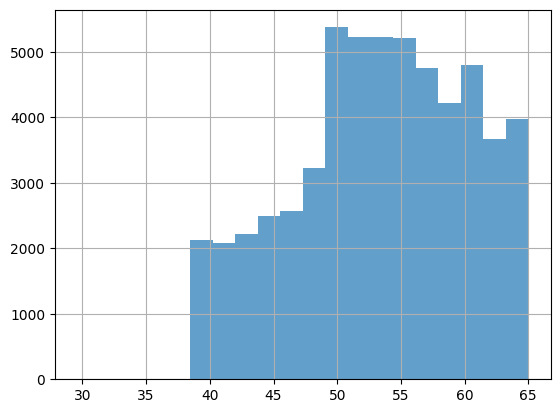

In [ ]:
# Histogram of ages in the dataset
patient_heart_data['age'].hist(bins=20, alpha=0.7)

In [ ]:
# Subsample the dataset (selecting 10000 random patients for easier visualization)
# Setting random_state ensures reproducibility of results - the same 10000 patients will be selected each time
df = patient_heart_data.sample(10000, random_state=42)

<Axes: title={'center': 'BMI'}, xlabel='gender'>

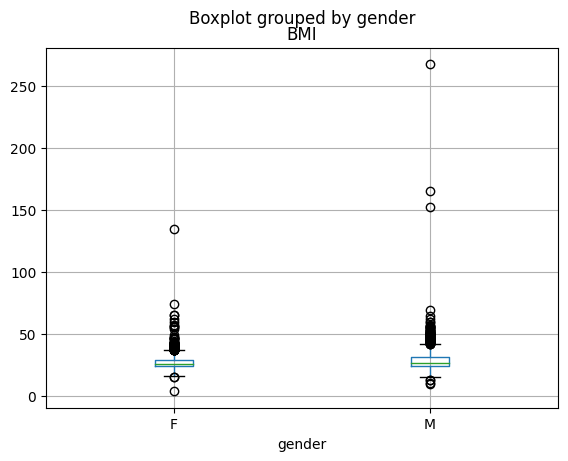

In [ ]:
# Creating a boxplot to visualize the distribution of BMI by gender
df.boxplot(column='BMI', by='gender')

array([<Axes: title={'center': 'BMI'}, xlabel='gender'>,
       <Axes: title={'center': 'age'}, xlabel='gender'>], dtype=object)

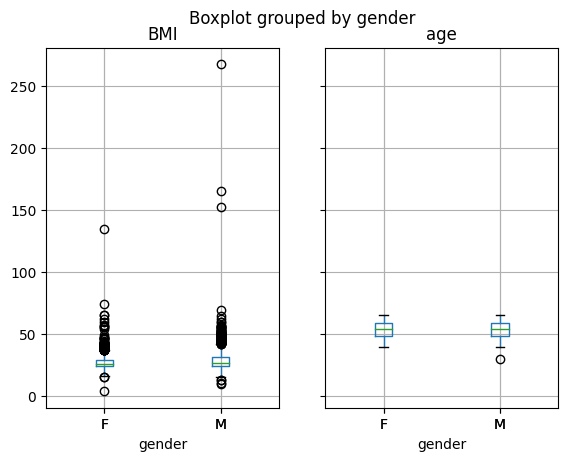

In [ ]:
# Boxplots of BMI and age by gender
df.boxplot(column=['BMI','age'], by='gender')

<Axes: xlabel='weight', ylabel='height'>

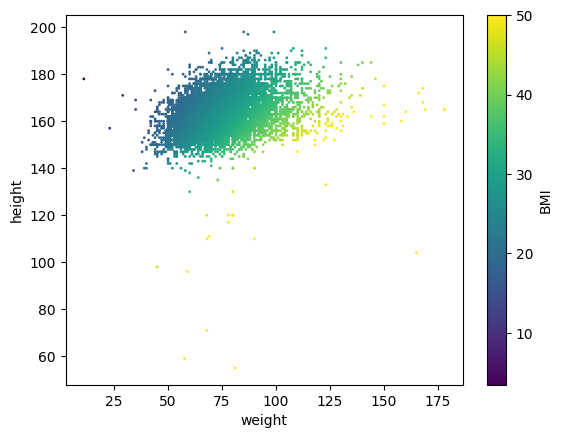

In [ ]:
# Scatter plot to visualize the relationship between 'weight' and 'height'
# Each point represents a patient, and the color (c='BMI') shows BMI.
df.plot.scatter('weight', 'height', s=1, alpha=1, c='BMI', vmax=50)

- Calculate pairwise correlations

In [ ]:
# Mapping 'heart_disease' column to numeric values
# Replacing 'Yes' with 1 and 'No' with 0 makes it easier to perform numerical operations
df['heart_disease'] = df['heart_disease'].map({'Yes': 1, 'No': 0})

In [ ]:
# Creating a DataFrame with only numerical columns, as only these are valid for correlation calculations
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlations between numerical columns
# This helps to identify if any features are correlated, indicating possible relationships
numeric_df.corr()

,age,height,weight,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
age,1.000000,-0.079659,0.058159,0.091737,0.121755,0.018780,0.163177,0.101481,0.261924
height,-0.079659,1.000000,0.284430,-0.304342,0.002034,0.015839,-0.053090,-0.024453,-0.010510
weight,0.058159,0.284430,1.000000,0.742753,0.142762,0.047713,0.140803,0.108470,0.185569
BMI,0.091737,-0.304342,0.742753,1.000000,0.122804,0.034657,0.145614,0.101632,0.163521
ap_hi,0.121755,0.002034,0.142762,0.122804,1.000000,0.080247,0.112152,0.045841,0.234673
ap_lo,0.018780,0.015839,0.047713,0.034657,0.080247,1.000000,0.030112,0.013151,0.077269
cholesterol,0.163177,-0.053090,0.140803,0.145614,0.112152,0.030112,1.000000,0.459272,0.222392
gluc,0.101481,-0.024453,0.108470,0.101632,0.045841,0.013151,0.459272,1.000000,0.088121
heart_disease,0.261924,-0.010510,0.185569,0.163521,0.234673,0.077269,0.222392,0.088121,1.000000


In [ ]:
numeric_df.corr()

,age,height,weight,BMI,ap_hi,ap_lo,cholesterol,gluc,heart_disease
age,1.000000,-0.079659,0.058159,0.091737,0.121755,0.018780,0.163177,0.101481,0.261924
height,-0.079659,1.000000,0.284430,-0.304342,0.002034,0.015839,-0.053090,-0.024453,-0.010510
weight,0.058159,0.284430,1.000000,0.742753,0.142762,0.047713,0.140803,0.108470,0.185569
BMI,0.091737,-0.304342,0.742753,1.000000,0.122804,0.034657,0.145614,0.101632,0.163521
ap_hi,0.121755,0.002034,0.142762,0.122804,1.000000,0.080247,0.112152,0.045841,0.234673
ap_lo,0.018780,0.015839,0.047713,0.034657,0.080247,1.000000,0.030112,0.013151,0.077269
cholesterol,0.163177,-0.053090,0.140803,0.145614,0.112152,0.030112,1.000000,0.459272,0.222392
gluc,0.101481,-0.024453,0.108470,0.101632,0.045841,0.013151,0.459272,1.000000,0.088121
heart_disease,0.261924,-0.010510,0.185569,0.163521,0.234673,0.077269,0.222392,0.088121,1.000000
